# CreditFix - ML engineer Assignment- Data Analysis

### Problem Statement

In this kernel ,I will try to show you how different models can improve just by doing simple process on the data.

we are going to work on binary classification problem, where we got some information about sample of peoples, and we need to predict whether we should give some one a loan or not depending on his information, so we will go with machine learning techniques to solve our problem.

### Business Understanding

CreditFix is a peer-to-peer lending company, headquartered in Islamabad, Pakistan. It is the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission, Pakistan (SECP), and to offer CreditFix is a peer-to-peer lending company, headquartered in Islamabad, Pakistan. It is the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission, Pakistan (SECP), and to offer loan to under-previllige as well as Vehicle purchase on easy installments. Creditfix is the Pakistans leading fintech company aim to facilitate those who got rejected by bank due to insufficient credit history.

Solving this case study will give us an idea about how real business problems are solved using EDA and Machine Learning. In this case study, we will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers. to under-previllige as well as Vehicle purchase on easy installments. Creditfix is the Pakistans leading fintech company aim to facilitate those who got rejected by bank due to insufficient credit history.

Solving this case study will give us an idea about how real business problems are solved using EDA and Machine Learning. In this case study, we will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

### Kernel Understanding

    1. Libraries, Data description and missing values handling.
    2. Exploratary Data Analysis
    3. Feature selection
    4. Feature engineering.
    5. Model Selection (XGBoost & RandomForestClassifier)
    6. Performance Analysis using evaluation metrics.

### Addressing Tasks:

0. Sub-task: You should also be able to deduce new field in the data; such as age of the loanee based on the Date of birth.
        Seperate column and function executed to calculate Age in terms of months as well as days, column also included in dataset.

1. Analyze, using graphs, how different fields (loan info and loanee info) correlate to a loanee defaulting his/her loan or not. 
2. Analyze, using graphs, whether the demographic data plays a major role in a loanee defaulting his/her loan or the financial data.
        Both Data Analysis discussed in EDA section. 

3. Present the fields that should be used in the future analysis.
        Addressed the issue in Lesser and Higher Importance Section. 

4. Present your recommendations for the estimators that can be used as a model to predict loan defaults.
        Discussed in Conclusion.

### 1. Importing data & libraries

In [258]:
import warnings
warnings.filterwarnings('ignore')

In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.express as px
import itertools
import xgboost as xgb
import eli5

from plotly import tools
from plotly.subplots import make_subplots
from numpy import mean, std
from scipy import stats
from imblearn.over_sampling import SMOTE
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import balanced_accuracy_score,f1_score, precision_score, recall_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from eli5.sklearn import PermutationImportance

%matplotlib inline
plt.style.use('ggplot')
py.init_notebook_mode(connected=True)
#for displaying 500 results in pandas dataframe
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)



In [260]:
data = pd.read_csv(r"C:\Users\Mustafa Minhas\PycharmProjects\CreditFix - Assigment\data.csv")

print(" Shape of dataing dataframe: ", data.shape) #Shape of dataframe
data.drop_duplicates() # Drop duplicates
print(data.shape)


 Shape of dataing dataframe:  (233154, 41)
(233154, 41)


### 2. Data Analysis (variable inspection)

In [261]:
print("Names of columns ", list(data.columns))

Names of columns  ['UNIQUEID', 'DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'BRANCH_ID', 'SUPPLIER_ID', 'MANUFACTURER_ID', 'CURRENT_PINCODE_ID', 'DATE_OF_BIRTH', 'EMPLOYMENT_TYPE', 'DISBURSAL_DATE', 'STATE_ID', 'EMPLOYEE_CODE_ID', 'MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG', 'DRIVING_FLAG', 'PASSPORT_FLAG', 'PERFORM_CNS_SCORE', 'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES', 'LOAN_DEFAULT']


Checking Missing Values: Identifying fields with more than 50% null data. These fields will be removed from analysis.

In [262]:
#Null values in dataing dataset

null= data.isnull().sum().sort_values(ascending=False)
total =data.shape[0]
percent_missing= (data.isnull().sum()/total).sort_values(ascending=False)

missing_data= pd.concat([null, percent_missing], axis=1, keys=['Total missing', 'Percent missing'])

missing_data.reset_index(inplace=True)
missing_data= missing_data.rename(columns= { "index": " column name"})
 
print ("Null Values in each column:\n", missing_data.sort_values(by ='Total missing', ascending = False))

Null Values in each column:
                             column name  Total missing  Percent missing
0                       EMPLOYMENT_TYPE           7661         0.032858
21        PERFORM_CNS_SCORE_DESCRIPTION              0         0.000000
23                       DISBURSAL_DATE              0         0.000000
24                           ASSET_COST              0         0.000000
25                                  LTV              0         0.000000
26                            BRANCH_ID              0         0.000000
27                          SUPPLIER_ID              0         0.000000
28                      MANUFACTURER_ID              0         0.000000
29                   CURRENT_PINCODE_ID              0         0.000000
30                        DATE_OF_BIRTH              0         0.000000
31                             STATE_ID              0         0.000000
32                    PERFORM_CNS_SCORE              0         0.000000
33                     EMPLOYEE_COD

Treating missing values in employment type since its less then 50% so we will replace the labels

In [263]:
data_null_unique= data.EMPLOYMENT_TYPE .unique()
print(data_null_unique)

data.EMPLOYMENT_TYPE= data.EMPLOYMENT_TYPE.fillna("Missing") #Filling missing labels with "Missing" tag 
data_null_unique= data.EMPLOYMENT_TYPE .unique()
print(data_null_unique)


['Salaried' 'Self employed' nan]
['Salaried' 'Self employed' 'Missing']


In [264]:
print(data.info()) #Need to confirm DataTypes of all classes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UNIQUEID                             233154 non-null  int64  
 1   DISBURSED_AMOUNT                     233154 non-null  int64  
 2   ASSET_COST                           233154 non-null  int64  
 3   LTV                                  233154 non-null  float64
 4   BRANCH_ID                            233154 non-null  int64  
 5   SUPPLIER_ID                          233154 non-null  int64  
 6   MANUFACTURER_ID                      233154 non-null  int64  
 7   CURRENT_PINCODE_ID                   233154 non-null  int64  
 8   DATE_OF_BIRTH                        233154 non-null  object 
 9   EMPLOYMENT_TYPE                      233154 non-null  object 
 10  DISBURSAL_DATE                       233154 non-null  object 
 11  STATE_ID     

1. AVERAGE_ACCT_AGE, CREDIT_HISTORY_LENGTH are object, but they should be int.
2. DATE_OF_BIRTH & DISBURSAL_DATE should be datetime type

Lets convert the Age of Average Account and credit history into Month and Year ratio. 

In [265]:

data[['AVERAGE_ACCT_Yr','AVERAGE_ACCT_Month']] = data['AVERAGE_ACCT_AGE'].str.split("yrs",expand=True)
data[['AVERAGE_ACCT_Month','AVERAGE_ACCT_Month1']] = data['AVERAGE_ACCT_Month'].str.split("mon",expand=True)
data["AVERAGE_ACCT_AGE"]= data["AVERAGE_ACCT_Yr"].astype(str).astype(int)+((data["AVERAGE_ACCT_Month"].astype(str).astype(int))/12)
data= data.drop(columns= ["AVERAGE_ACCT_Yr","AVERAGE_ACCT_Month",'AVERAGE_ACCT_Month1'])

data[['CREDIT_HISTORY_LENGTH_Yr','CREDIT_HISTORY_LENGTH_Month']] = data['CREDIT_HISTORY_LENGTH'].str.split("yrs",expand=True)
data[['CREDIT_HISTORY_LENGTH_Month','CREDIT_HISTORY_LENGTH_Month1']] = data['CREDIT_HISTORY_LENGTH_Month'].str.split("mon",expand=True)
data["CREDIT_HISTORY_LENGTH"]= data["CREDIT_HISTORY_LENGTH_Yr"].astype(str).astype(int)+((data["CREDIT_HISTORY_LENGTH_Month"].astype(str).astype(int))/12)
data= data.drop(columns= ["CREDIT_HISTORY_LENGTH_Yr","CREDIT_HISTORY_LENGTH_Month",'CREDIT_HISTORY_LENGTH_Month1'])



'DATE OF BIRTH' needs to be in Pandas Dataframe

In [266]:
#format='%d%b%Y:%H:%M:%S.%f'

data['DATE_OF_BIRTH'] =  pd.to_datetime(data['DATE_OF_BIRTH'], format='%d-%m-%Y')
data['DISBURSAL_DATE'] =  pd.to_datetime(data['DISBURSAL_DATE'], format='%d-%m-%Y')



In [267]:
now = pd.Timestamp('now')
#data['DATE_OF_BIRTH'] = data['DATE_OF_BIRTH'].where(data['DATE_OF_BIRTH'] < now, data['DATE_OF_BIRTH'] -  np.timedelta64(100, 'Y'))   
data['AGE'] = (now - data['DATE_OF_BIRTH'])  

data['AGE']= data['AGE'].astype(str)
data[['AGE','AGE_waste']] = data['AGE'].str.split("days",expand=True)
data['AGE']= data['AGE'].astype(str).astype(int)
data= data.drop(columns= ['AGE_waste'])

print(data['AGE'].head())
data['AGE'] = data['AGE'] /365

0    13592
1    13015
2    12991
3     9941
4    15806
Name: AGE, dtype: int32


In [268]:
data.head()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,STATE_ID,EMPLOYEE_CODE_ID,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,AGE
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,2018-08-03,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,0,37.238356
1,537409,47145,65550,73.23,67,22807,45,1502,1985-07-31,Self employed,2018-09-26,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1.916667,1.916667,0,1,35.657534
2,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,2018-08-01,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,0,35.591781
3,624493,57513,66113,88.48,67,22807,45,1501,1993-12-30,Self employed,2018-10-26,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0.666667,1.250000,1,1,27.235616
4,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,Self employed,2018-09-26,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,1,1,43.304110


### 3. EDA

### 3.1 Class Distribution

In [269]:
class_df = data.groupby('LOAN_DEFAULT').count()['UNIQUEID'].reset_index().sort_values(by='UNIQUEID',ascending=False)
class_df.style.background_gradient(cmap='winter')

,LOAN_DEFAULT,UNIQUEID
0,0,182543
1,1,50611


In [270]:
train_0 = train[train["LOAN_DEFAULT"]==0]
train_1 = train[train["LOAN_DEFAULT"]==1]

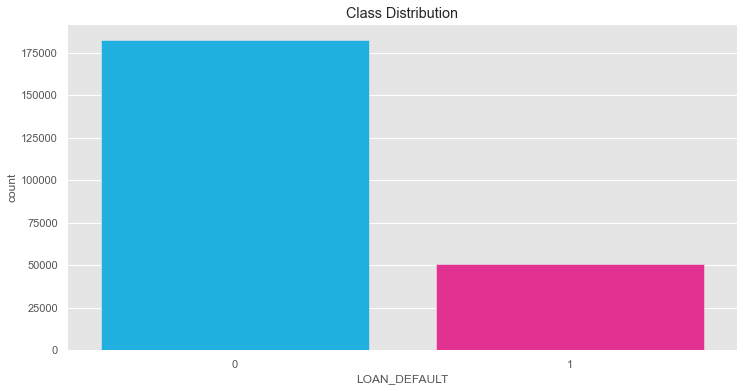

% of no defaults       : 78.29288796246257
Number of no defaults     : 182543
% of defaults         : 21.70711203753742
Number of defaults    : 50611


In [271]:
#Graph
my_pal = {0: 'deepskyblue', 1: 'deeppink'}

plt.figure(figsize = (12, 6))
ax = sns.countplot(x = 'LOAN_DEFAULT', data = data, palette = my_pal)
plt.title('Class Distribution')
plt.show()

# Count and %
Count_Normal_transacation = len(data[data['LOAN_DEFAULT']==0])
Count_Fraud_transacation = len(data[data['LOAN_DEFAULT']==1]) 
Percentage_of_Normal_transacation = Count_Normal_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print('% of no defaults       :', Percentage_of_Normal_transacation*100)
print('Number of no defaults     :', Count_Normal_transacation)
Percentage_of_Fraud_transacation= Count_Fraud_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print('% of defaults         :',Percentage_of_Fraud_transacation*100)
print('Number of defaults    :', Count_Fraud_transacation)

Let's start with the data which has lesser importance

        1. MOBILENO_AVL_FLAG : if Mobile no. was shared by the customer then flagged as 1
        2. AADHAR_FLAG : if aadhar was shared by the customer then flagged as 1
        3. PAN_FLAG : if pan was shared by the customer then flagged as 1
        4. VOTERID_FLAG : if voter was shared by the customer then flagged as 1
        5. PASSPORT_FLAG : if DL was shared by the customer then flagged as 1
        6. DRIVING_FLAG : if passport was shared by the customer then flagged as 1


In [272]:
print("Employment type\n")
print(data.groupby(["EMPLOYMENT_TYPE"]).LOAN_DEFAULT.value_counts(normalize=True))
print("-------------------------------------------------------------------------\n")
print("Mobile Flag\n")
print(data.groupby(["MOBILENO_AVL_FLAG"]).LOAN_DEFAULT.value_counts(normalize=True))
print("-------------------------------------------------------------------------\n")
print("Aadhar Flag\n")
print(data.groupby(["AADHAR_FLAG"]).LOAN_DEFAULT.value_counts(normalize=True))
print("-------------------------------------------------------------------------\n")
print("Pan Flag\n")
print(data.groupby(["PAN_FLAG"]).LOAN_DEFAULT.value_counts(normalize=True))
print("-------------------------------------------------------------------------\n")
print("Voter ID Flag\n")
print(data.groupby(["VOTERID_FLAG"]).LOAN_DEFAULT.value_counts(normalize=True))
print("-------------------------------------------------------------------------\n")
print("Driving L Flag\n")
print(data.groupby(["DRIVING_FLAG"]).LOAN_DEFAULT.value_counts(normalize=True))
print("-------------------------------------------------------------------------\n")
print("Passport\n")
print(data.groupby(["PASSPORT_FLAG"]).LOAN_DEFAULT.value_counts(normalize=True))

Employment type

EMPLOYMENT_TYPE  LOAN_DEFAULT
Missing          0               0.785407
                 1               0.214593
Salaried         0               0.796542
                 1               0.203458
Self employed    0               0.772343
                 1               0.227657
Name: LOAN_DEFAULT, dtype: float64
-------------------------------------------------------------------------

Mobile Flag

MOBILENO_AVL_FLAG  LOAN_DEFAULT
1                  0               0.782929
                   1               0.217071
Name: LOAN_DEFAULT, dtype: float64
-------------------------------------------------------------------------

Aadhar Flag

AADHAR_FLAG  LOAN_DEFAULT
0            0               0.743594
             1               0.256406
1            0               0.790403
             1               0.209597
Name: LOAN_DEFAULT, dtype: float64
-------------------------------------------------------------------------

Pan Flag

PAN_FLAG  LOAN_DEFAULT
0         0   

In [273]:
def plot_bar_comp(var,nrow):
    
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.countplot(data[feature])
        sns.countplot(data[feature])
        plt.ylabel('Count plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

<Figure size 432x288 with 0 Axes>

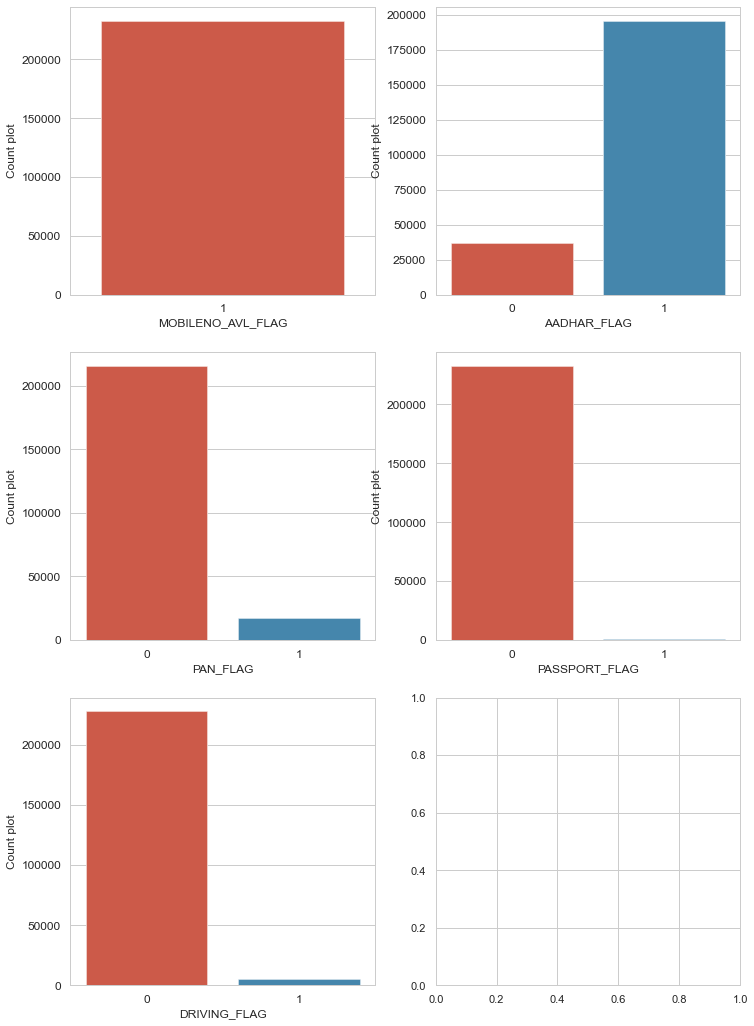

In [274]:
var = ['MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG', 'PASSPORT_FLAG', 'DRIVING_FLAG']
plot_bar_comp(var,nrow=3)

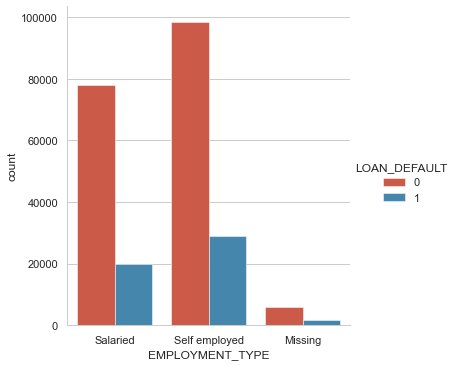

In [275]:
# Employment Type
sns.catplot(data=data,kind='count',x='EMPLOYMENT_TYPE',hue='LOAN_DEFAULT')

### 3.2 Default vs Disbursal date

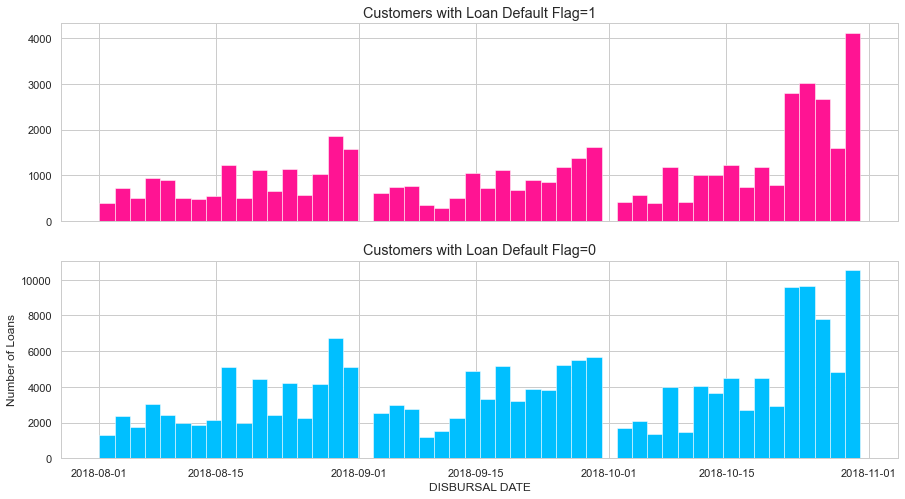

In [276]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,8))

bins = 50

ax1.hist(data.DISBURSAL_DATE[data.LOAN_DEFAULT == 1], bins = bins, color = 'deeppink')
ax1.set_title('Customers with Loan Default Flag=1')

ax2.hist(data.DISBURSAL_DATE[data.LOAN_DEFAULT == 0], bins = bins, color = 'deepskyblue')
ax2.set_title('Customers with Loan Default Flag=0')

plt.xlabel('DISBURSAL DATE')
plt.ylabel('Number of Loans')
plt.show()

In [277]:
data['DISBURSAL_TIME'] = (now - data['DISBURSAL_DATE'])  

data['DISBURSAL_TIME']= data['DISBURSAL_TIME'].astype(str)
data[['DISBURSAL_TIME','DISBURSAL_TIME_WASTE']] = data['DISBURSAL_TIME'].str.split("days",expand=True)
data['DISBURSAL_TIME']= data['DISBURSAL_TIME'].astype(str).astype(int)
data= data.drop(columns= ['DISBURSAL_TIME_WASTE'])

print(data['DISBURSAL_TIME'].head())

0    959
1    905
2    961
3    875
4    905
Name: DISBURSAL_TIME, dtype: int32


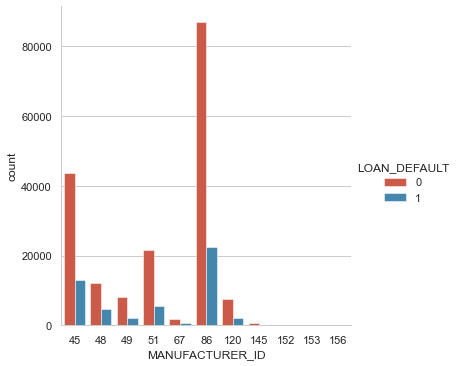

In [278]:
# MANUFACTURER_ID
sns.catplot(data=data,kind='count',x='MANUFACTURER_ID',hue='LOAN_DEFAULT')

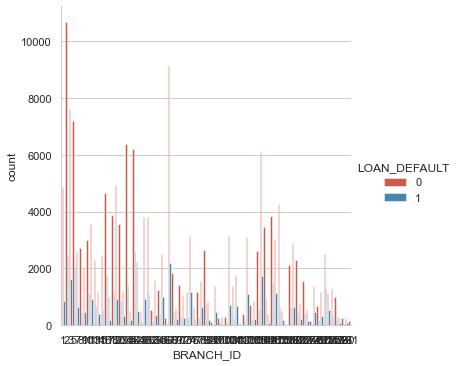

In [279]:
sns.catplot(data=data,kind='count',x='BRANCH_ID',hue='LOAN_DEFAULT')

### 3.3 Univariate analysis

We will use important information and viualize the data to see if there are any outliers that needs to take care of or throw them into the dustbin. 

Important Variable that needs to see are:

    1. DISBURSAL AMOUNT 
    2. ASSET COST
    3. LTV
    4. CNS SCORE 
    5. PRI_NO_OF_ACCTS
    6. PRI_OVERDUE_ACCTS

Pre-Defined Functions to plot Univariate Analysis 

In [280]:
def plot_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(data[feature].dropna(),color=color, kde=True,bins=100)
    plt.show()
    
# Plot distribution of multiple features, with TARGET = 1/0 on the same graph
def plot_distribution_comp(var,nrow=2):
    
    i = 0
    t1 = data.loc[data['LOAN_DEFAULT'] != 0]
    t0 = data.loc[data['LOAN_DEFAULT'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="LOAN_DEFAULT = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="LOAN_DEFAULT = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

In [281]:
def plot_bar_comp(var,nrow=2):
    
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.countplot(data[feature])
        sns.countplot(data[feature])
        plt.ylabel('Count plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

In [282]:
# Box Plot for one feature
def plot_box(feature, color):
    plt.figure(figsize=(10,6))
    plt.title("Box Plot of %s" % feature)
    sns.boxplot(data[feature].dropna(),color=color)
    plt.show()

In [283]:
# Bar Plot for one feature
def plot_bar(feature):
    plt.figure(figsize=(10,50))
    sns.catplot(y=feature, hue="LOAN_DEFAULT", kind="count",
            palette="pastel", edgecolor=".6",
            data=data);

Dig Deep into Variables with high importance

#### 'DISBURSED_AMOUNT' : Amount of Loan disbursed

count    233154.000000
mean      54356.993528
std       12971.314171
min       13320.000000
25%       47145.000000
50%       53803.000000
75%       60413.000000
max      990572.000000
Name: DISBURSED_AMOUNT, dtype: float64


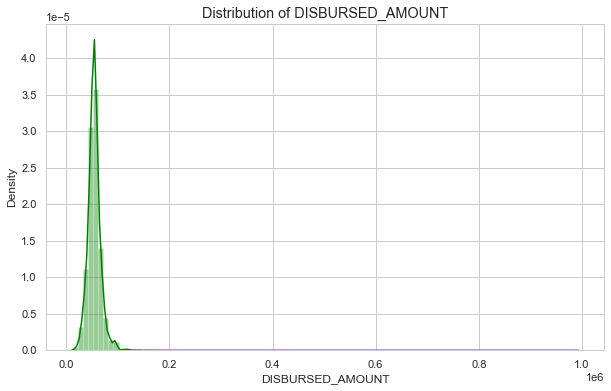

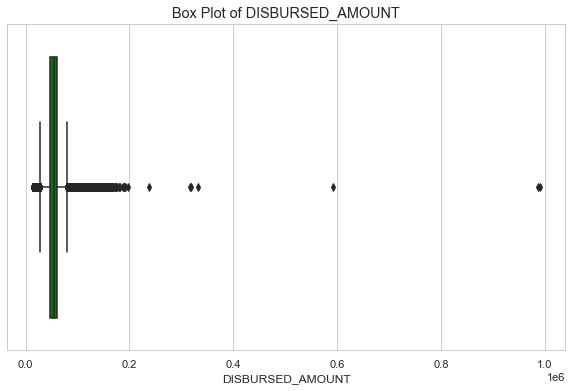

In [284]:
print(data.DISBURSED_AMOUNT.describe())
plot_distribution('DISBURSED_AMOUNT','green')
plot_box("DISBURSED_AMOUNT", "green")

Hey!, There is an Outlier, - either we can treat outliers or do the binning

#### Outlier Treatment for DISBURSED AMOUNT


In [285]:
def impute_outlier(x):
    if x <= lower:
        return(data_mean)
    elif x>= (upper):
        return(data_mean)
    else:
        return(x)

In [286]:
obs = len(data.DISBURSED_AMOUNT) #Number of observations in column
print("No. of observations in column: ",obs)

data_mean, data_std = mean(data.DISBURSED_AMOUNT), std(data.DISBURSED_AMOUNT) # calculate summary statistics
print('Statistics: Mean=%.3f, Std dev=%.3f' % (data_mean, data_std))

cut_off = data_std * 3 # identify outliers
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in data.DISBURSED_AMOUNT if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

No. of observations in column:  233154
Statistics: Mean=54356.994, Std dev=12971.286
Identified outliers: 3076


In [287]:
data["DISBURSED_AMOUNT_new"]= data["DISBURSED_AMOUNT"].apply(impute_outlier)
print("No. of observations in column: ",len(data.DISBURSED_AMOUNT_new))

No. of observations in column:  233154


Lets Do! Binning.! (throw them into seperate Bucket(class))

In [288]:
bin_labels = ['Low', 'Medium', 'High', 'Extreme']
data['DISBURSED_AMOUNT_bins'] = pd.qcut(data['DISBURSED_AMOUNT'],
                              q=[0, .25, .5, .75, 1],
                              labels=bin_labels)
data['DISBURSED_AMOUNT_bins'].value_counts()

Medium     58676
Low        58537
Extreme    58207
High       57734
Name: DISBURSED_AMOUNT_bins, dtype: int64

<Figure size 720x3600 with 0 Axes>

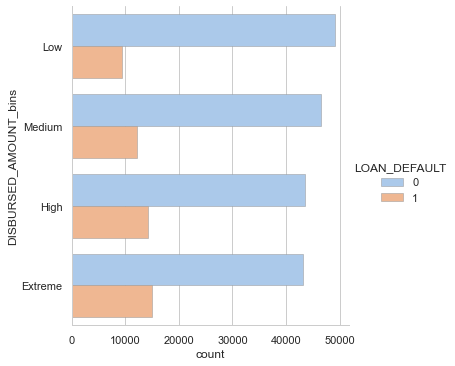

In [289]:
plot_bar("DISBURSED_AMOUNT_bins")

2nd Important Feature

'ASSET_COST' : Payment default in the first EMI on due date

count             233154.0
mean     75865.06814380195
std      18944.78128866533
min                37000.0
25%                65717.0
50%                70946.0
75%               79201.75
max              1628992.0
Name: ASSET_COST, dtype: object


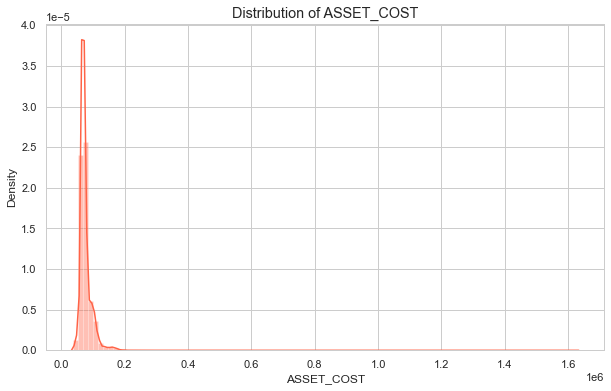

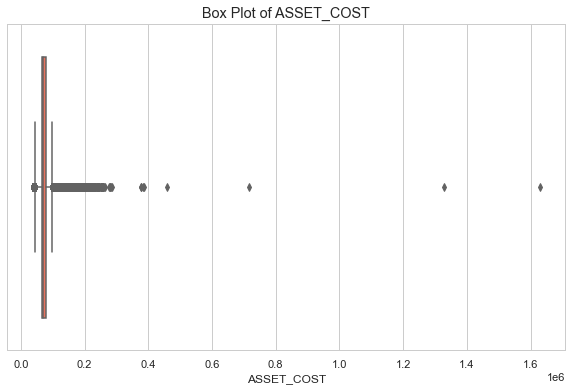

In [290]:
print(data.ASSET_COST.describe().astype(str))
plot_distribution('ASSET_COST','tomato')
plot_box("ASSET_COST", "tomato")

#### Outlier Treatment for ASSET_COST

In [291]:
def outlier_data(df, feature):
    #Number of observations in column
    obs = len(df[feature])
    print("No. of observations in column: ",obs)

    # calculate summary statistics
    data_mean, data_std = mean(df[feature]), std(df[feature])
    print('Statistics: Mean=%.3f, Std dev=%.3f' % (data_mean, data_std))
    # identify outliers
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    # identify outliers
    outliers = [x for x in df[feature] if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))


In [292]:
def impute_outlier(x):
    if x <= lower:
        return(data_mean)
    elif x>= (upper):
        return(data_mean)
    else:
        return(x)

In [293]:
outlier_data(data,"ASSET_COST")

No. of observations in column:  233154
Statistics: Mean=75865.068, Std dev=18944.741
Identified outliers: 4425


In [294]:
data["ASSET_COST_new"]= data["ASSET_COST"].apply(impute_outlier)
print("No. of observations in column: ",len(data.DISBURSED_AMOUNT_new))
outlier_data(data,"ASSET_COST_new")

No. of observations in column:  233154
No. of observations in column:  233154
Statistics: Mean=68018.188, Std dev=9598.448
Identified outliers: 60


Lets Do! Binning.! Again! (throw them into seperate Bucket(class))

In [295]:
bin_labels = ['Low', 'Medium', 'High', 'Extreme']
data['ASSET_COST_bins'] = pd.qcut(data['ASSET_COST'],
                              q=[0, .25, .5, .75, 1],
                              labels=bin_labels)
data['ASSET_COST_bins'].value_counts()


Low        58290
Extreme    58289
Medium     58288
High       58287
Name: ASSET_COST_bins, dtype: int64

<Figure size 720x3600 with 0 Axes>

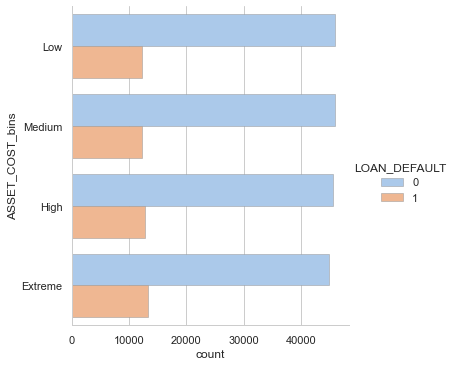

In [296]:
plot_bar("ASSET_COST_bins")

3rd Important Feature

'LTV' : Loan to Value of the asset

count              233154.0
mean      74.74653001878589
std      11.456635738792569
min                   10.03
25%                   68.88
50%                    76.8
75%                   83.67
max                    95.0
Name: LTV, dtype: object


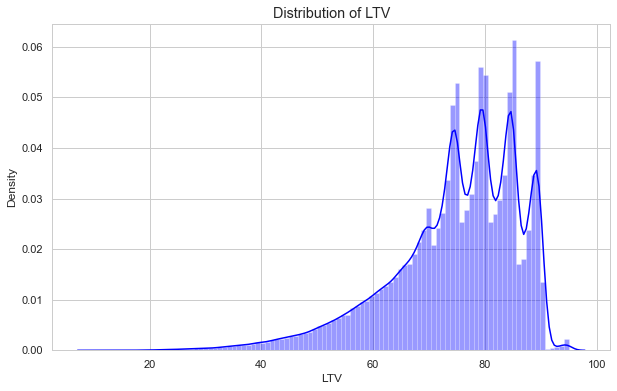

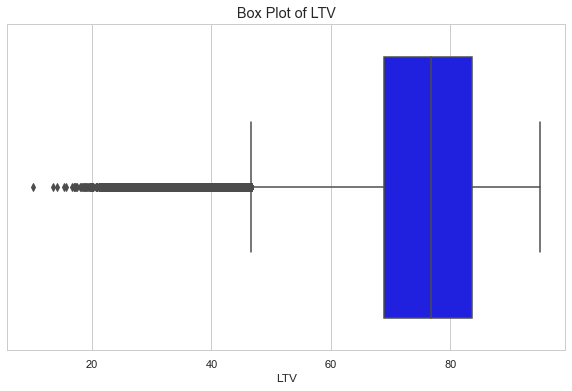

In [297]:
print(data.LTV.describe().astype(str))
plot_distribution('LTV','blue')
plot_box("LTV", "blue")

In [298]:
outlier_data(data,"LTV")

No. of observations in column:  233154
Statistics: Mean=74.747, Std dev=11.457
Identified outliers: 2745


In [299]:
data["LTV_new"]= data["LTV"].apply(impute_outlier)
print("No. of observations in column: ",len(data.LTV_new))
outlier_data(data,"LTV_new")

No. of observations in column:  233154
No. of observations in column:  233154
Statistics: Mean=54356.994, Std dev=0.000
Identified outliers: 0


Binning - One more time 

In [300]:
bin_labels = ['Low', 'Medium', 'High', 'Extreme']
data['LTV_bins'] = pd.qcut(data['LTV'],
                              q=[0, .25, .5, .75, 1],
                              labels=bin_labels)
data['LTV_bins'].value_counts()

Low        58303
Medium     58299
High       58285
Extreme    58267
Name: LTV_bins, dtype: int64

<Figure size 720x3600 with 0 Axes>

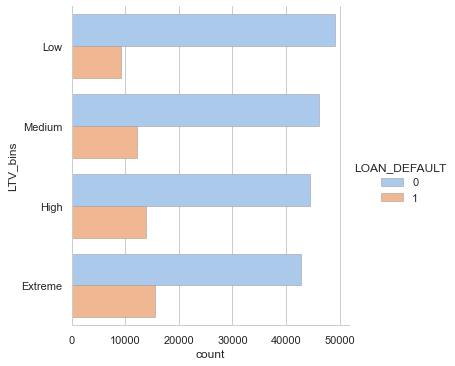

In [301]:
plot_bar("LTV_bins")

4th Important Feature

'PERFORM_CNS_SCORE': Bureau Score

count              233154.0
mean     289.46299441570807
std      338.37477900845766
min                     0.0
25%                     0.0
50%                     0.0
75%                   678.0
max                   890.0
Name: PERFORM_CNS_SCORE, dtype: object


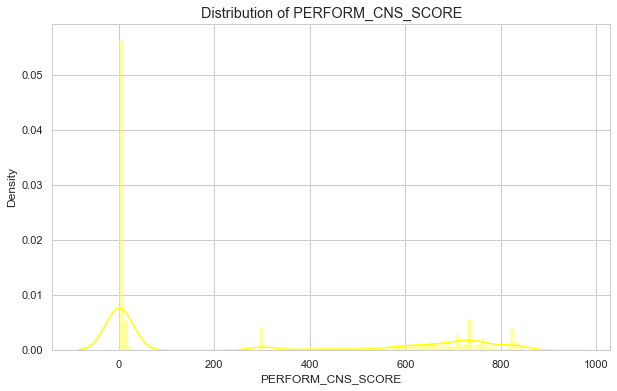

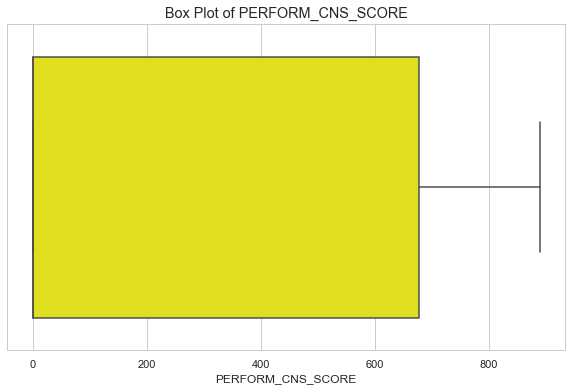

In [302]:
print(data.PERFORM_CNS_SCORE.describe().astype(str))
plot_distribution('PERFORM_CNS_SCORE','yellow')
plot_box("PERFORM_CNS_SCORE", "yellow")

In [303]:
outlier_data(data,"PERFORM_CNS_SCORE")

No. of observations in column:  233154
Statistics: Mean=289.463, Std dev=338.374
Identified outliers: 0


In [304]:
bin_labels = ["No History",'Very Low', "Low" ,'Medium', 'High']
cut_bins = [-1,10,150, 350, 650, 1000]

data['PERFORM_CNS_SCORE_bins'] = pd.cut(data['PERFORM_CNS_SCORE'],
                              bins=cut_bins,
                              labels=bin_labels)
data['PERFORM_CNS_SCORE_bins'].value_counts()

No History    116950
High           65034
Medium         28425
Very Low       12835
Low             9910
Name: PERFORM_CNS_SCORE_bins, dtype: int64

<Figure size 720x3600 with 0 Axes>

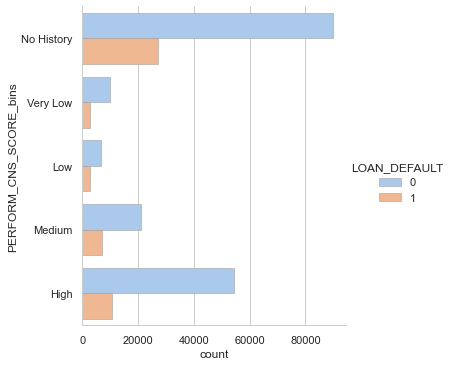

In [305]:
plot_bar("PERFORM_CNS_SCORE_bins")

In [306]:
data.groupby(["PERFORM_CNS_SCORE_DESCRIPTION"]).PERFORM_CNS_SCORE_bins.value_counts()

PERFORM_CNS_SCORE_DESCRIPTION                            PERFORM_CNS_SCORE_bins
A-Very Low Risk                                          High                       14124
B-Very Low Risk                                          High                        9201
C-Very Low Risk                                          High                       16045
D-Very Low Risk                                          High                       11358
E-Low Risk                                               High                        5821
F-Low Risk                                               High                        8485
G-Low Risk                                               Medium                      3988
H-Medium Risk                                            Medium                      6855
I-Medium Risk                                            Medium                      5557
J-High Risk                                              Medium                      3748
K-High Risk         

In [307]:
data.PERFORM_CNS_SCORE_DESCRIPTION.value_counts()

No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the customer        3672
Not Scored

In [308]:
cns = data.groupby("PERFORM_CNS_SCORE_DESCRIPTION")['LOAN_DEFAULT']
cnsscore = pd.concat([cns.value_counts(), 
                cns.value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))
print (cnsscore)


                                                                 counts  percentage
PERFORM_CNS_SCORE_DESCRIPTION                      LOAN_DEFAULT                    
A-Very Low Risk                                    0              11783   83.425375
                                                   1               2341   16.574625
B-Very Low Risk                                    0               7993   86.870992
                                                   1               1208   13.129008
C-Very Low Risk                                    0              13275   82.736055
                                                   1               2770   17.263945
D-Very Low Risk                                    0               9659   85.041381
                                                   1               1699   14.958619
E-Low Risk                                         0               4821   82.820821
                                                   1               1000   17

5th Important Feature

PRI_NO_OF_ACCTS : count of total loans taken by the customer at the time of disbursement


count              233154.0
mean     2.4406358029456925
std      5.2172330215741844
min                     0.0
25%                     0.0
50%                     0.0
75%                     3.0
max                   453.0
Name: PRI_NO_OF_ACCTS, dtype: object


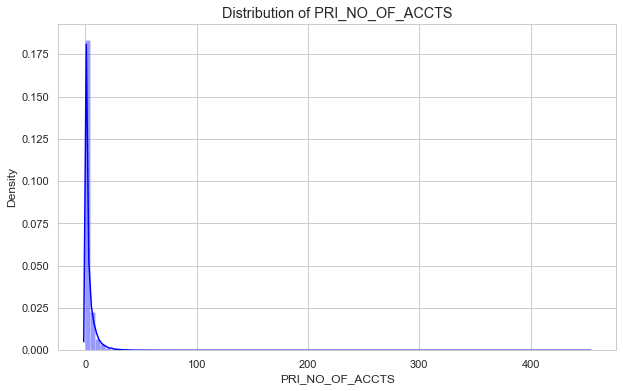

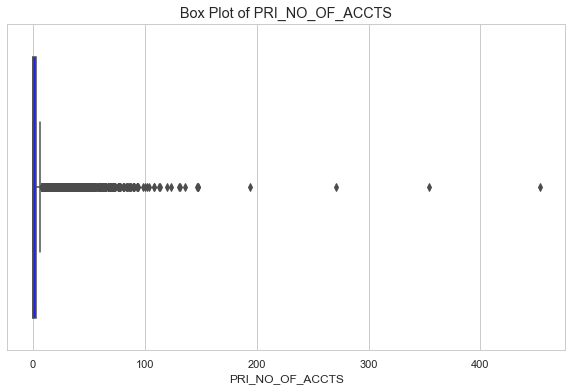

In [309]:
print(data.PRI_NO_OF_ACCTS .describe().astype(str))
plot_distribution('PRI_NO_OF_ACCTS','blue')
plot_box("PRI_NO_OF_ACCTS", "blue")

In [310]:
outlier_data(data,"PRI_NO_OF_ACCTS")

No. of observations in column:  233154
Statistics: Mean=2.441, Std dev=5.217
Identified outliers: 4119


In [311]:
data["PRI_NO_OF_ACCTS_new"]= data["PRI_NO_OF_ACCTS"].apply(impute_outlier)
outlier_data(data,"PRI_NO_OF_ACCTS_new")

No. of observations in column:  233154
Statistics: Mean=54356.994, Std dev=0.000
Identified outliers: 0


In [312]:
bin_labels = ["One",'More than One']
cut_bins = [-1,1, 1000]

data['PRI_NO_OF_ACCTS_bins'] = pd.cut(data['PRI_NO_OF_ACCTS'],
                              bins=cut_bins,
                              labels=bin_labels)
data['PRI_NO_OF_ACCTS_bins'].value_counts()

One              151928
More than One     81226
Name: PRI_NO_OF_ACCTS_bins, dtype: int64

<Figure size 720x3600 with 0 Axes>

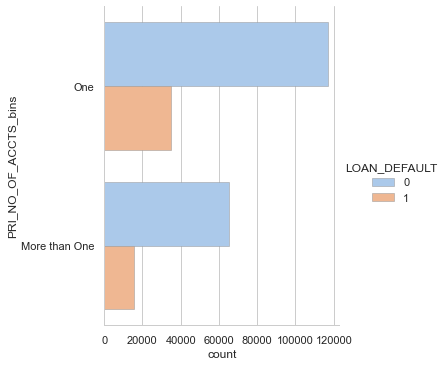

In [313]:
plot_bar("PRI_NO_OF_ACCTS_bins")

6th Important Feature

PRI_OVERDUE_ACCTS: count of default accounts at the time of disbursement¶

count               233154.0
mean     0.15654889043293274
std       0.5487867498775106
min                      0.0
25%                      0.0
50%                      0.0
75%                      0.0
max                     25.0
Name: PRI_OVERDUE_ACCTS, dtype: object


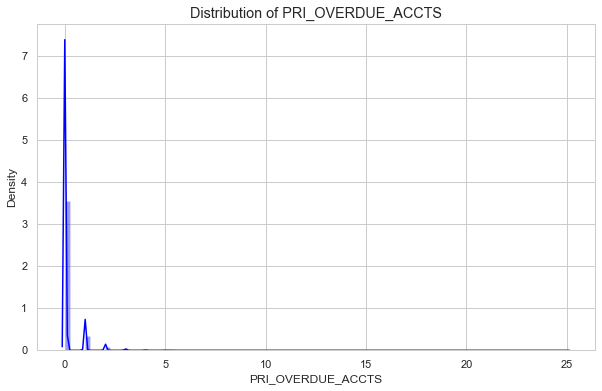

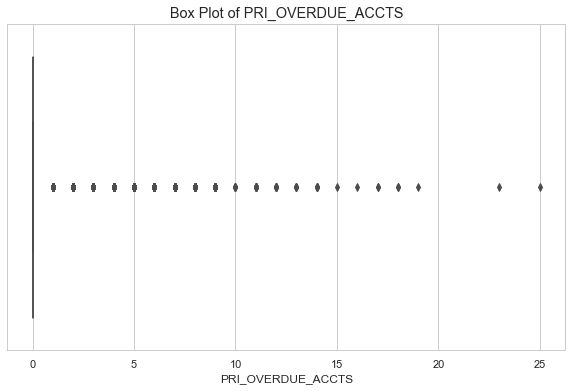

In [314]:
print(data.PRI_OVERDUE_ACCTS.describe().astype(str))
plot_distribution('PRI_OVERDUE_ACCTS','blue')
plot_box("PRI_OVERDUE_ACCTS", "blue")

In [315]:
outlier_data(data,"PRI_OVERDUE_ACCTS")

No. of observations in column:  233154
Statistics: Mean=0.157, Std dev=0.549
Identified outliers: 6305


In [316]:
data["PRI_OVERDUE_ACCTS_new"]= data["PRI_OVERDUE_ACCTS"].apply(impute_outlier)
outlier_data(data,"PRI_OVERDUE_ACCTS_new")

No. of observations in column:  233154
Statistics: Mean=54356.994, Std dev=0.000
Identified outliers: 0


In [317]:
bin_labels = ["None",'One (or more)']
cut_bins = [-1,0, 1000]

data['PRI_OVERDUE_ACCTS_bins'] = pd.cut(data['PRI_OVERDUE_ACCTS'],
                              bins=cut_bins,
                              labels=bin_labels)
data['PRI_OVERDUE_ACCTS_bins'].value_counts()

None             206879
One (or more)     26275
Name: PRI_OVERDUE_ACCTS_bins, dtype: int64

<Figure size 720x3600 with 0 Axes>

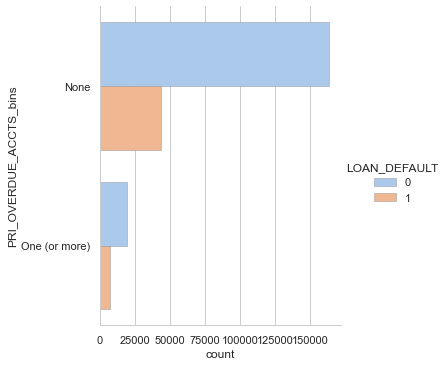

In [318]:
plot_bar("PRI_OVERDUE_ACCTS_bins")

### 3.5 Feature Selection

    Step1 : Remove the redundant features that are of lesser importance to predict the defaulter 
    Step2 : Specify our Target Variable i.e. LOAN_DEFAULT , and Add only relevent independent features to predict the output

In [319]:
#Useless features
#data = data.drop(['DISBURSED_AMOUNT','ASSET_COST', 'LTV', 'PRI_NO_OF_ACCTS','PRI_OVERDUE_ACCTS', 'DATE_OF_BIRTH', 'DISBURSAL_DATE', 'STATE_ID', 'EMPLOYEE_CODE_ID', 'SUPPLIER_ID', 'MANUFACTURER_ID', 'CURRENT_PINCODE_ID','BRANCH_ID'],axis=1)
data = data.drop([ 'DATE_OF_BIRTH' , 'STATE_ID', 'EMPLOYEE_CODE_ID', 'SUPPLIER_ID', 'MANUFACTURER_ID', 'CURRENT_PINCODE_ID','BRANCH_ID'],axis=1)

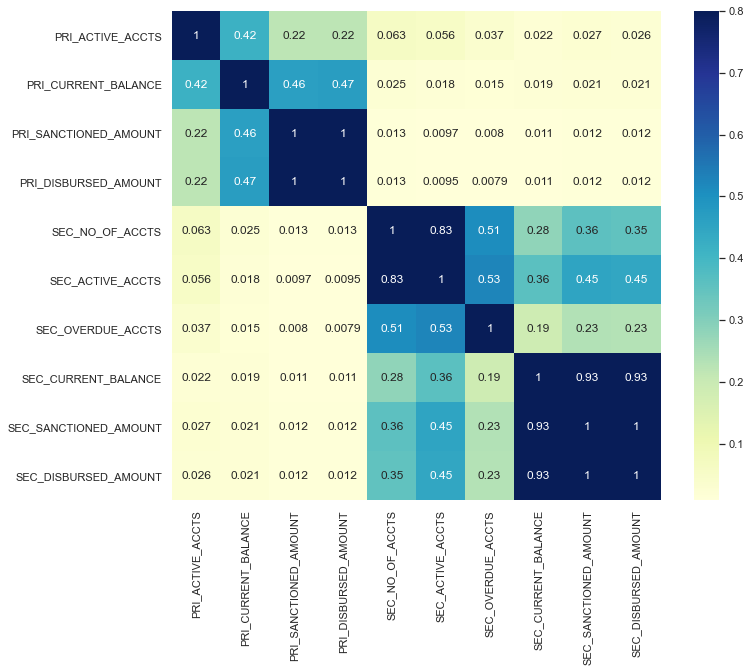

In [320]:
#Highly Correlated
sns.set()

cols = data[['PRI_ACTIVE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 
              'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT',
              'SEC_DISBURSED_AMOUNT']]
corr = cols.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, annot=True, vmax=.8, square=True,cmap = 'YlGnBu');

Low Co-relation: (Wont be included in our final dataset) 

        1. 'PRI_ACTIVE_ACCTS' 
        2. 'PRI_CURRENT_BALANCE' 
        3. 'PRI_SANCTIONED_AMOUNT' 
        4. 'PRI_DISBURSED_AMOUNT'
        5. 'SEC_OVERDUE_ACCTS'

High Co-relation: (Will be included in our final dataset)

        1. 'SEC_NO_OF_ACCTS'  
        2. 'SEC_ACTIVE_ACCTS'
        3. 'SEC_CURRENT_BALANCE'  
        4. 'SEC_SANCTIONED_AMOUNT'
        5. 'SEC_DISBURSED_AMOUNT

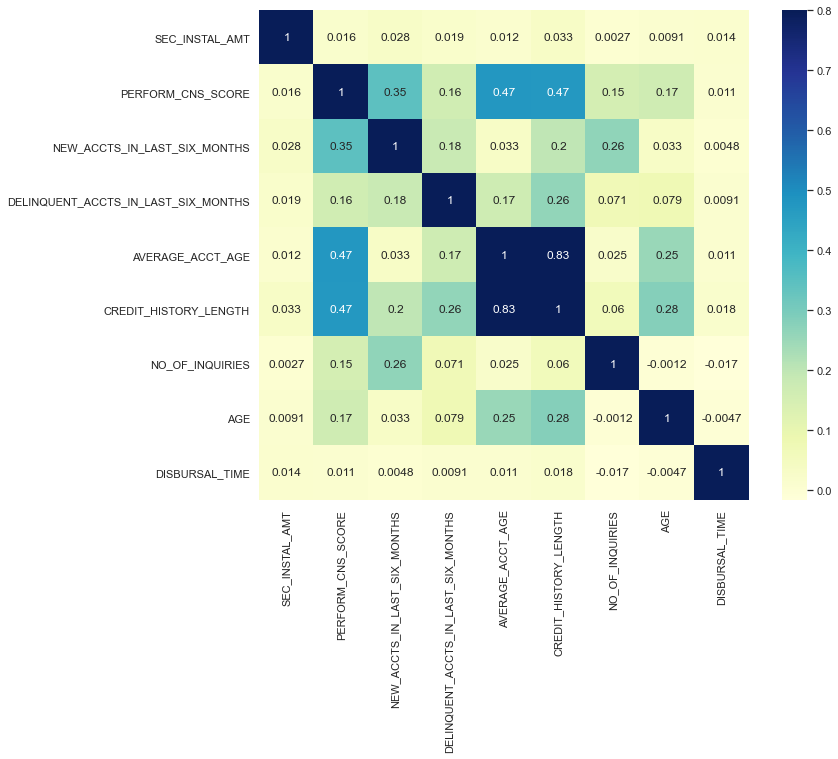

In [321]:
#Highly Correlated
sns.set()

cols = data[['SEC_INSTAL_AMT', 'PERFORM_CNS_SCORE','NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 
              'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES','AGE', 'DISBURSAL_TIME']]
corr = cols.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, annot=True, vmax=.8, square=True,cmap = 'YlGnBu');

High Co-relation: (Will be included in our final dataset)

    1. 'AVERAGE_ACCT_AGE'
    2. 'CREDIT_HISTORY_LENGTH

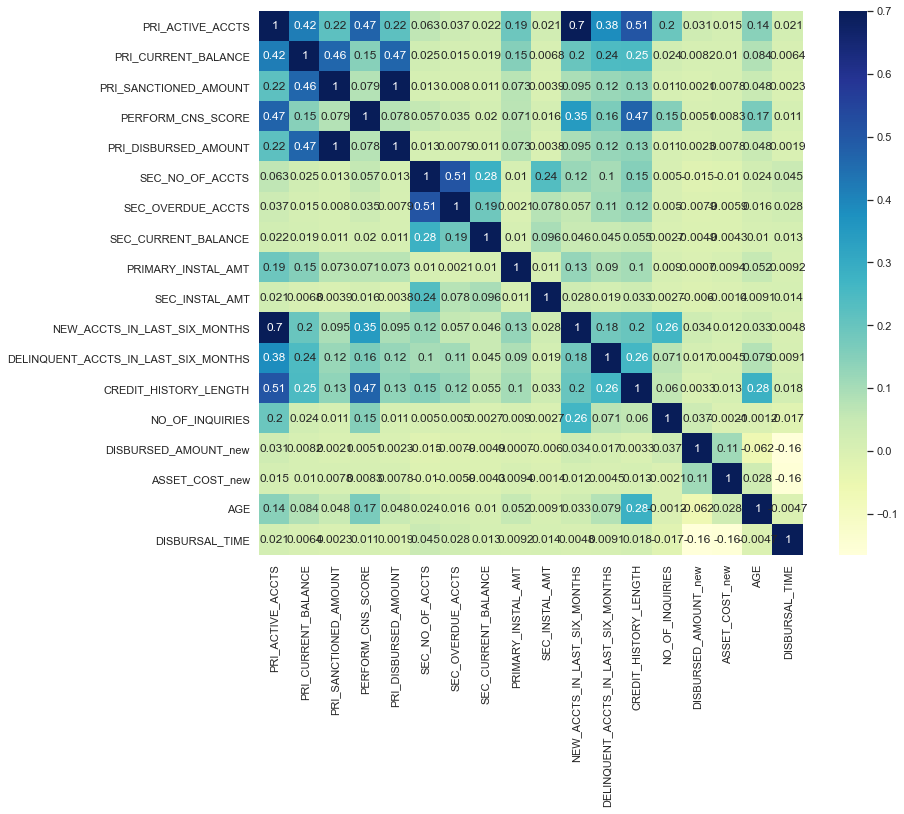

In [322]:
#Highly Correlated
sns.set()

cols = data[['PRI_ACTIVE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PERFORM_CNS_SCORE',
              'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE',
              'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS', 
              'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES',
              'DISBURSED_AMOUNT_new','ASSET_COST_new','AGE', 'DISBURSAL_TIME']]
corr = cols.corr()
f, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(corr, annot=True, vmax=.7, square=True,cmap = 'YlGnBu');

In [323]:
data.head()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,EMPLOYMENT_TYPE,DISBURSAL_DATE,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,AGE,DISBURSAL_TIME,DISBURSED_AMOUNT_new,DISBURSED_AMOUNT_bins,ASSET_COST_new,ASSET_COST_bins,LTV_new,LTV_bins,PERFORM_CNS_SCORE_bins,PRI_NO_OF_ACCTS_new,PRI_NO_OF_ACCTS_bins,PRI_OVERDUE_ACCTS_new,PRI_OVERDUE_ACCTS_bins
0,420825,50578,58400,89.55,Salaried,2018-08-03,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,0,37.238356,959,50578.0,Medium,58400.0,Low,54356.993528,Extreme,No History,54356.993528,One,54356.993528,None
1,537409,47145,65550,73.23,Self employed,2018-09-26,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1.916667,1.916667,0,1,35.657534,905,47145.0,Low,65550.0,Low,54356.993528,Medium,Medium,54356.993528,One,54356.993528,One (or more)
2,417566,53278,61360,89.63,Self employed,2018-08-01,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,0,35.591781,961,53278.0,Medium,61360.0,Low,54356.993528,Extreme,No History,54356.993528,One,54356.993528,None
3,624493,57513,66113,88.48,Self employed,2018-10-26,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0.666667,1.250000,1,1,27.235616,875,57513.0,High,66113.0,Medium,54356.993528,Extreme,Low,54356.993528,More than One,54356.993528,None
4,539055,52378,60300,88.39,Self employed,2018-09-26,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,1,1,43.304110,905,52378.0,Medium,60300.0,Low,54356.993528,Extreme,No History,54356.993528,One,54356.993528,None


Preparing Datasets 1) Binned Variables 2) Continous variables

In [324]:
data_true = data[['EMPLOYMENT_TYPE', 'MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG',
                   'DRIVING_FLAG', 'PASSPORT_FLAG', 'PERFORM_CNS_SCORE', 'PERFORM_CNS_SCORE_DESCRIPTION', 
                   'PRI_ACTIVE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 
                   'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 
                   'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES',
                   'LOAN_DEFAULT', 'DISBURSED_AMOUNT_new', 'ASSET_COST_new', 
                   'LTV_new', 'AGE', 'DISBURSAL_TIME']]

In [325]:
data_bin = data [['UNIQUEID', 'EMPLOYMENT_TYPE', 'MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG', 
                    'VOTERID_FLAG', 'DRIVING_FLAG', 'PASSPORT_FLAG', 'PERFORM_CNS_SCORE', 
                    'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_ACTIVE_ACCTS', 'PRI_CURRENT_BALANCE',
                    'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE',
                    'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 
                    'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES', 'LOAN_DEFAULT',
                    'DISBURSED_AMOUNT_bins', 'ASSET_COST_bins', 'LTV_bins',
                    'PERFORM_CNS_SCORE_bins', 'PRI_NO_OF_ACCTS_bins', 'PRI_OVERDUE_ACCTS_bins', 'AGE', 'DISBURSAL_TIME']]

Function to Plot Evaluation Matrics

In [326]:
# Confusion Matrix

def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix"',
                          cmap = plt.cm.Blues) :
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [327]:
# Precision, Recall, F1 Score
def show_metrics():
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print('Precision =     {:.3f}'.format(tp/(tp+fp)))
    print('Recall    =     {:.3f}'.format(tp/(tp+fn)))
    print('F1_score  =     {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/
                                                 ((tp/(tp+fp))+(tp/(tp+fn))))))

In [328]:
# Precision-recall curve
def plot_precision_recall():
    plt.step(recall, precision, color = 'b', alpha = 0.2,
             where = 'post')
    plt.fill_between(recall, precision, step ='post', alpha = 0.2,
                 color = 'b')

    plt.plot(recall, precision, linewidth=2)
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.show();

In [329]:
# ROC curve
def plot_roc():
    plt.plot(fpr, tpr, label = 'ROC curve', linewidth = 2)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
    plt.xlim([0.0,0.001])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show();

In [330]:
#feature importance plot
def plot_feature_importance(model):
    tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': model.feature_importances_})
    tmp = tmp.sort_values(by='Feature importance',ascending=False)
    plt.figure(figsize = (15,8))
    plt.title('Features importance',fontsize=14)
    s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()

### 3.5.1 Standardization of data

In [331]:
scaler_data = StandardScaler() 
def scaleColumns(df, cols_to_scale):

    for col in cols_to_scale:

        df[col] = pd.DataFrame(scaler_data.fit_transform(pd.DataFrame(data_true[col])),columns=[col])

    return df

In [332]:
scaled_df = scaleColumns(data_true,['PERFORM_CNS_SCORE','PRI_ACTIVE_ACCTS', 'PRI_CURRENT_BALANCE', 
                                 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_OVERDUE_ACCTS', 
                                 'SEC_CURRENT_BALANCE', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT',
                                 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'CREDIT_HISTORY_LENGTH', 
                                 'NO_OF_INQUIRIES', 'DISBURSED_AMOUNT_new',
                                 'ASSET_COST_new', 'LTV_new', 'AGE', 'DISBURSAL_TIME'])

scaled_df.head()

,EMPLOYMENT_TYPE,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_ACTIVE_ACCTS,PRI_CURRENT_BALANCE,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,DISBURSED_AMOUNT_new,ASSET_COST_new,LTV_new,AGE,DISBURSAL_TIME
0,Salaried,1,1,0,0,0,0,-0.855453,No Bureau History Available,-0.535617,-0.176064,-0.091711,-0.094259,-0.065216,-0.031884,-0.086581,-0.020784,-0.253566,-0.568640,-0.292450,0,-0.282591,-1.002057,-1.0,0.026250,1.880044
1,Self employed,1,1,0,0,0,0,0.911822,I-Medium Risk,-0.020549,-0.146773,-0.070599,-0.094259,-0.065216,-0.031884,-0.073427,-0.020784,2.347632,0.236085,-0.292450,1,-0.589728,-0.257144,-1.0,-0.134554,-0.094516
2,Self employed,1,1,0,0,0,0,-0.855453,No Bureau History Available,-0.535617,-0.176064,-0.091711,-0.094259,-0.065216,-0.031884,-0.086581,-0.020784,-0.253566,-0.568640,-0.292450,0,-0.041033,-0.693673,-1.0,-0.141243,1.953176
3,Self employed,1,1,0,0,0,0,0.045917,L-Very High Risk,-0.535617,-0.176064,-0.091711,-0.094259,-0.065216,-0.031884,-0.086376,-0.020784,-0.253566,-0.043819,1.122986,1,0.337856,-0.198489,-1.0,-0.991244,-1.191493
4,Self employed,1,1,0,0,0,0,-0.855453,No Bureau History Available,-0.535617,-0.176064,-0.091711,-0.094259,-0.065216,-0.031884,-0.086581,-0.020784,-0.253566,-0.568640,1.122986,1,-0.121552,-0.804108,-1.0,0.643267,-0.094516


### 3.5.2 Dummy insertion

In [333]:
data_dummy = pd.get_dummies(scaled_df, prefix_sep='_', drop_first=True)
data_dummy.head()

,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PRI_ACTIVE_ACCTS,PRI_CURRENT_BALANCE,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,DISBURSED_AMOUNT_new,ASSET_COST_new,LTV_new,AGE,DISBURSAL_TIME,EMPLOYMENT_TYPE_Salaried,EMPLOYMENT_TYPE_Self employed,PERFORM_CNS_SCORE_DESCRIPTION_B-Very Low Risk,PERFORM_CNS_SCORE_DESCRIPTION_C-Very Low Risk,PERFORM_CNS_SCORE_DESCRIPTION_D-Very Low Risk,PERFORM_CNS_SCORE_DESCRIPTION_E-Low Risk,PERFORM_CNS_SCORE_DESCRIPTION_F-Low Risk,PERFORM_CNS_SCORE_DESCRIPTION_G-Low Risk,PERFORM_CNS_SCORE_DESCRIPTION_H-Medium Risk,PERFORM_CNS_SCORE_DESCRIPTION_I-Medium Risk,PERFORM_CNS_SCORE_DESCRIPTION_J-High Risk,PERFORM_CNS_SCORE_DESCRIPTION_K-High Risk,PERFORM_CNS_SCORE_DESCRIPTION_L-Very High Risk,PERFORM_CNS_SCORE_DESCRIPTION_M-Very High Risk,PERFORM_CNS_SCORE_DESCRIPTION_No Bureau History Available,PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: More than 50 active Accounts found,PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: No Activity seen on the customer (Inactive),PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: No Updates available in last 36 months,PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: Not Enough Info available on the customer,PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: Only a Guarantor,PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: Sufficient History Not Available
0,1,1,0,0,0,0,-0.855453,-0.535617,-0.176064,-0.091711,-0.094259,-0.065216,-0.031884,-0.086581,-0.020784,-0.253566,-0.568640,-0.292450,0,-0.282591,-1.002057,-1.0,0.026250,1.880044,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,1,0,0,0,0,0.911822,-0.020549,-0.146773,-0.070599,-0.094259,-0.065216,-0.031884,-0.073427,-0.020784,2.347632,0.236085,-0.292450,1,-0.589728,-0.257144,-1.0,-0.134554,-0.094516,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,-0.855453,-0.535617,-0.176064,-0.091711,-0.094259,-0.065216,-0.031884,-0.086581,-0.020784,-0.253566,-0.568640,-0.292450,0,-0.041033,-0.693673,-1.0,-0.141243,1.953176,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,1,0,0,0,0,0.045917,-0.535617,-0.176064,-0.091711,-0.094259,-0.065216,-0.031884,-0.086376,-0.020784,-0.253566,-0.043819,1.122986,1,0.337856,-0.198489,-1.0,-0.991244,-1.191493,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,-0.855453,-0.535617,-0.176064,-0.091711,-0.094259,-0.065216,-0.031884,-0.086581,-0.020784,-0.253566,-0.568640,1.122986,1,-0.121552,-0.804108,-1.0,0.643267,-0.094516,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [334]:
y = data_dummy[['LOAN_DEFAULT']] 
X= data_dummy.loc[:, data_dummy.columns != 'LOAN_DEFAULT']
X.shape

(233154, 44)

In [335]:
np.any(np.isnan(X))

False

In [336]:
X = X.fillna(0)
X.shape

(233154, 44)

In [337]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 101)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

### Time to Deploy ML Models

   ####    4.1 Logistic Regression

In [338]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[36464    41]
 [10083    43]]
78.0


In [339]:
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, logpred))
print("F1 Score ",f1_score(y_test, logpred))
print("Recall Score ",recall_score(y_test, logpred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, logpred))

Accuracy of model  0.7828912097102786
F1 Score  0.00842311459353575
Recall Score  0.004246494173414972
Balanced Accuracy Score  0.5015616801780648


Logit Model not predicting the defaults well, however the accuracy is fine 

#### 4.2 Random Forest

In [340]:
from sklearn.ensemble import RandomForestClassifier

# train model
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, rfc_pred))
print(round(accuracy_score(y_test, rfc_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[35104  1401]
 [ 9439   687]]
77.0


In [341]:
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, rfc_pred))
print("F1 Score ",f1_score(y_test, rfc_pred))
print("Recall Score ",recall_score(y_test, rfc_pred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, rfc_pred))

Accuracy of model  0.767536617271772
F1 Score  0.11249385950548552
Recall Score  0.06784515109618804
Balanced Accuracy Score  0.5147334233771585


Again, Random Forest not predicting the defaults well, however the accuracy is fine

#### 4.3 Naive Bayes

In [342]:
from sklearn.naive_bayes import GaussianNB

# train model
nb = GaussianNB().fit(X_train, y_train)

# predict on test set
nb_pred = nb.predict(X_test)
print(confusion_matrix(y_test, nb_pred))
print(round(accuracy_score(y_test, nb_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[ 6915 29590]
 [ 1178  8948]]
34.0


In [343]:
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, nb_pred))
print("F1 Score ",f1_score(y_test, nb_pred))
print("Recall Score ",recall_score(y_test, nb_pred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, nb_pred))

Accuracy of model  0.34018142437434323
F1 Score  0.36774617787276015
Recall Score  0.8836658107841201
Balanced Accuracy Score  0.5365459583984975


Model accuracy is very poor as well model not predicting defaults

#### 4.4 Decision Tree Classifier

In [344]:
from sklearn.tree import DecisionTreeClassifier

# train model
dtree = DecisionTreeClassifier(max_depth = 10, random_state= 101, max_features =None , min_samples_leaf = 30).fit(X_train, y_train)

# predict on test set
dtree_pred = dtree.predict(X_test)
print(confusion_matrix(y_test, dtree_pred))
print(round(accuracy_score(y_test, dtree_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[36190   315]
 [ 9951   175]]
78.0


In [345]:
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, dtree_pred))
print("F1 Score ",f1_score(y_test, dtree_pred))
print("Recall Score ",recall_score(y_test, dtree_pred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, dtree_pred))

Accuracy of model  0.7798460251763848
F1 Score  0.03296910324039186
Recall Score  0.017282243729014417
Balanced Accuracy Score  0.5043266443956673


Accuracy score is good, Model still Not Predicting Defaults

#### 4.6 XG Boost

In [346]:
# XG Boost
from xgboost import XGBClassifier

# train model
xgb = XGBClassifier().fit(X_train, y_train)

# predict on test set
xgb_pred = xgb.predict(X_test)
print(confusion_matrix(y_test, xgb_pred))
print(round(accuracy_score(y_test, xgb_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[17:45:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[36280   225]
 [ 9942   184]]
78.0


In [347]:
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, xgb_pred))
print("F1 Score ",f1_score(y_test, xgb_pred))
print("Recall Score ",recall_score(y_test, xgb_pred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, xgb_pred))

Accuracy of model  0.7819690763655079
F1 Score  0.0349311817750356
Recall Score  0.018171044835078018
Balanced Accuracy Score  0.5060037527969391


why precision and recall is getting low score???

Answer is simple, we are dealing with a imbalance dataset, Accuracy score is good because of the standarization otherwise if we have to deal with imbalance dataset better to use models designed for such cases.

Only, Random Forest shows some good result but still model is not predicting the loan defaults correctly due to class imbalance. 

### 5. Dealing with Imbalanced data

SMOTE is designed for imbalance datasets. Although its severely and painfully slow to train. SMOTE or Synthetic Minority Oversampling Technique is used to create synthetic data. SMOTE uses a nearest neighbors algorithm to generate new and synthetic data we can use for training our model.

In [348]:
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

sm = SMOTE(random_state=27)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [349]:
# train model
sgd = SGDClassifier(loss= "modified_huber", shuffle = True, random_state= 101).fit(X_train, y_train)

# predict on test set
sgd_pred = sgd.predict(X_test)
print(confusion_matrix(y_test, sgd_pred))
print(round(accuracy_score(y_test, sgd_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[20044 25701]
 [ 3899  8645]]
49.0


In [350]:
# train model
dtree = DecisionTreeClassifier(max_depth = 10, random_state= 101, max_features =None , min_samples_leaf = 30).fit(X_train, y_train)

# predict on test set
dtree_pred = dtree.predict(X_test)
print(confusion_matrix(y_test, dtree_pred))
print(round(accuracy_score(y_test, dtree_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[25128 20617]
 [ 5258  7286]]
56.00000000000001


In [351]:
perm = PermutationImportance(rfc, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1303 ± 0.0014,DISBURSED_AMOUNT_new
0.1127 ± 0.0016,DISBURSAL_TIME
0.1060 ± 0.0009,AGE
0.0987 ± 0.0005,ASSET_COST_new
0.0755 ± 0.0007,PERFORM_CNS_SCORE
0.0653 ± 0.0007,CREDIT_HISTORY_LENGTH
0.0491 ± 0.0017,EMPLOYMENT_TYPE_Self employed
0.0489 ± 0.0007,PRI_DISBURSED_AMOUNT
0.0462 ± 0.0009,PRI_CURRENT_BALANCE
0.0382 ± 0.0009,PRIMARY_INSTAL_AMT


In [352]:
print("Accuracy of model ",accuracy_score(y_test, dtree_pred))
print("F1 Score ",f1_score(y_test, dtree_pred))
print("Recall Score ",recall_score(y_test, dtree_pred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, dtree_pred))

Accuracy of model  0.5560912007411347
F1 Score  0.36027393873464036
Recall Score  0.5808354591836735
Balanced Accuracy Score  0.5650706971292725


In [353]:
# train model
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, rfc_pred))
print(round(accuracy_score(y_test, rfc_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, rfc_pred))
print("F1 Score ",f1_score(y_test, rfc_pred))
print("Recall Score ",recall_score(y_test, rfc_pred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, rfc_pred))

[[38399  7346]
 [ 9711  2833]]
71.0
Accuracy of model  0.7073718883494313
F1 Score  0.24935087796505742
Recall Score  0.22584502551020408
Balanced Accuracy Score  0.5326295845662289


So, Although the Accuracy is not getting good enough but model now predicting defaults better

PCA is another technique to handle imbalance dataset 

In [354]:
y = data_dummy[['LOAN_DEFAULT']]
X= data_dummy.loc[:, data_dummy.columns != 'LOAN_DEFAULT']
X.shape

(233154, 44)

In [355]:
pca = PCA()
pca.fit(X)

PCA()

In [356]:
pca.explained_variance_ratio_.astype(str)

array(['0.16265829350707625', '0.0990362141223016', '0.07462430773577719',
       '0.07358981469493346', '0.06085225395809952',
       '0.05492265440885167', '0.05417331740689768',
       '0.050860139826425316', '0.04937237829966857',
       '0.04837174208752888', '0.047106943633690404',
       '0.045681380296309845', '0.030792454186135507',
       '0.027879267610844194', '0.02648257217151161',
       '0.025929758169308283', '0.022180068647334128',
       '0.013668751388107176', '0.003768018625631661',
       '0.003546093335569375', '0.0034366769983810207',
       '0.0025400541925315627', '0.0021101944189279042',
       '0.002009892903218177', '0.001850685409909958',
       '0.0017814169868697546', '0.0015677351561001849',
       '0.0015197371949381988', '0.0013412339627867688',
       '0.0010616394683435441', '0.0009210425276718838',
       '0.0009079937390059767', '0.000865722100269089',
       '0.0007485076826041491', '0.0004445140003828903',
       '0.00038651899122313116', '0.0003

Text(0, 0.5, 'Cumulative variance explained')

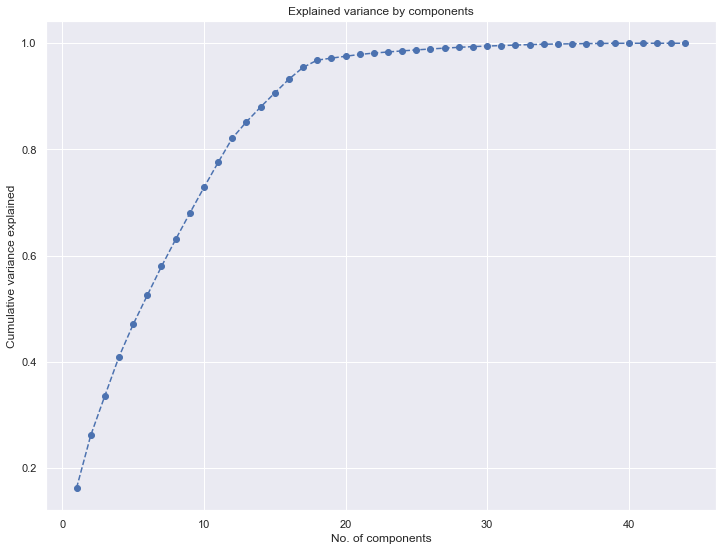

In [357]:
plt.figure(figsize= (12,9))
plt.plot(range(1,45), pca.explained_variance_ratio_.cumsum(), marker= 'o', linestyle='--')
plt.title("Explained variance by components")
plt.xlabel("No. of components")
plt.ylabel("Cumulative variance explained")

In [358]:
pca = PCA(n_components = 17)
pca.fit(X)

PCA(n_components=17)

Applying K-Fold Cross Validation to avoid over-fititng 

In [359]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 101)
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [360]:
# train model
dtree = DecisionTreeClassifier(max_depth = 10, random_state= 101, max_features =None , min_samples_leaf = 30).fit(X_train, y_train)

# predict on test set
dtree_pred = dtree.predict(X_test)
print(confusion_matrix(y_test, dtree_pred))
print(round(accuracy_score(y_test, dtree_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[36190   315]
 [ 9951   175]]
78.0


In [361]:
# train model
sgd = SGDClassifier(loss= "modified_huber", shuffle = True, random_state= 101).fit(X_train, y_train)

# predict on test set
sgd_pred = sgd.predict(X_test)
print(confusion_matrix(y_test, sgd_pred))
print(round(accuracy_score(y_test, sgd_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

print("Accuracy of model ",accuracy_score(y_test, sgd_pred))
print("F1 Score ",f1_score(y_test, sgd_pred))
print("Recall Score ",recall_score(y_test, sgd_pred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, sgd_pred))

[[36478    27]
 [10111    15]]
78.0
Accuracy of model  0.7825909802491905
F1 Score  0.002950432730133753
Recall Score  0.0014813351767726645
Balanced Accuracy Score  0.5003708552339143


In [362]:
# train model
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, rfc_pred))
print(round(accuracy_score(y_test, rfc_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
print("Accuracy of model ",accuracy_score(y_test, rfc_pred))
print("F1 Score ",f1_score(y_test, rfc_pred))
print("Recall Score ",recall_score(y_test, rfc_pred))
print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, rfc_pred))

[[35039  1466]
 [ 9448   678]]
77.0
Accuracy of model  0.7659496901203062
F1 Score  0.11051344743276283
Recall Score  0.06695634999012443
Balanced Accuracy Score  0.51339873382262


## Conclusion:

The project has been made in order to predict the defaulter. However, with the given dataset we performed EDA (Exploratory Data Analysis), then took care of missing values. We dig deep into various features both important and unimportant. After Feature engineering and Feature selection process we deploy our dataset onto Machine learning model like DecisionTress, RandomForest, Logistic Regression etc. We have found out that without applying imbalnce dataset techniques like SMOTE or PCA we wont be able to predict our target variable better even after our model accuracy is fine. After applying Class imbalance techniques we have found that Random Forest with SMOTE (Synthetic Minority Oversampling Technique) gave a some suitable results given accuracy and predicting defaults. 

Furthermore, in order to tune the model, few recommendations are:

    1. Adding more relevent information into the dataset, Data Collection needs to tune up.
    2. Over-Sampling can be done but it may cause Overfitting.
    3. K-Folds cross validation helps curbs overfitting

